

# Project: Investigate a Dataset - [TMDB_Movie_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The datasets is collection of the 10000 movies collected from the movies database (TMDB). The columns for the datsets includes; id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj and revenue_adj.

### Question(s) for Analysis
> 1. what's the name of the directors of the top  most popular movies?
> 3. what's the relationship between the year of release of the movie  and its popularity?
> 4. How does the runtime of the movie affect its popularity?


In [1]:
#Import of the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling







In [2]:
#Use a function to load the data 
dataset= 'tmdb-movies.csv'
def read(data):
    return pd.read_csv(data)
df=read(dataset)

print(df.head(3))

       id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline      ...       \
0           The park is open.      ...        
1          What a Lovely Day.      ...        
2  One Choice Can Destroy You   


### Data Cleaning


In [3]:
#check the number of columns and rows in the data
df.shape


(10866, 21)

The dataset has 10866  rows and 21 columns.

In [4]:
#Summary statistics of the data
print(df.describe())

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

The summary statistics above displays the summary statistics such as mean, standard deviation, min, nax and percentiles of the numerical columns of the dataset.

In [5]:
#Drop un neccessary columns
df.drop(['id',  'budget', 'revenue', 'original_title',
       'cast', 'homepage',  'tagline', 'keywords', 'overview',
        'production_companies', 'release_date',
       'vote_count', 'vote_average', 'budget_adj',
       'revenue_adj'], axis=1, inplace=True)

The columns above are dropped since they will not take part in the analysis.

In [6]:
#print the two rows of the dataset again
print(df.head(2))

     imdb_id  popularity         director  runtime  \
0  tt0369610   32.985763  Colin Trevorrow      124   
1  tt1392190   28.419936    George Miller      120   

                                      genres  release_year  
0  Action|Adventure|Science Fiction|Thriller          2015  
1  Action|Adventure|Science Fiction|Thriller          2015  


In [7]:
#Check for the dupicates in the dataset
df['imdb_id'].duplicated().sum()

10

The number of duplicate record in the dataset are 10 records.

In [8]:
#Drop the duplicate records in the duplicate records in the dataset
df.drop_duplicates(inplace=True)


All the duplicates records in the data set are dropped, since when they are left they might cause noise in the datasets

In [9]:
#Drop the imdb_id   column
df.drop(['imdb_id'], axis=1, inplace=True)

The imdb_id column is dropped, since it has served it's purpose of helping in the checking of the duplicates in the data, hence it's dropped since it's no longer needed further in the data analysis.

In [10]:
#Check the missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 5 columns):
popularity      10865 non-null float64
director        10821 non-null object
runtime         10865 non-null int64
genres          10842 non-null object
release_year    10865 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 509.3+ KB


The genres and director column  has some  of its values missing.

In [11]:
#Dealing with the missing values, by replacing it with the previous value in the column of the dataset.
df.fillna(method='ffill', inplace=True)


The missing values in the genres and director columns is replaced with the previous values in the column since its values are strings. Hence other form of replacing the missing values such as using the mean, mode etc were not appropriate for the task.

In [12]:
#confirm if the the missing values have been replaced in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 5 columns):
popularity      10865 non-null float64
director        10865 non-null object
runtime         10865 non-null int64
genres          10865 non-null object
release_year    10865 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 509.3+ KB


All the missing values in the dataset have been replaced. The data is now complete with no any missing value. 

### Research Question 1 (The name of the directors of the top ten most popular movies?)

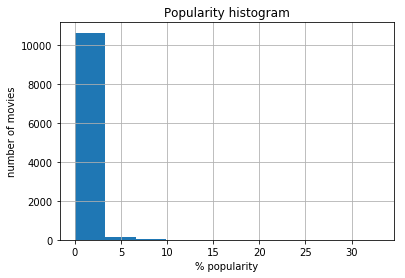

In [13]:
#The distribution of popularity
df['popularity'].hist();
plt.title('Popularity histogram')
plt.ylabel('number of movies')
plt.xlabel('% popularity')
plt.show()

The distribution of the movies popularity is slightly skewed to the right. This is because from the histogram displayed above the right tail is slightly longer than the left tail.

In [14]:
#The number of movies directed by a director
df['director'].value_counts(ascending=False)

Woody Allen                                  45
Clint Eastwood                               34
Steven Spielberg                             29
Martin Scorsese                              29
Ridley Scott                                 23
Ron Howard                                   22
Steven Soderbergh                            22
Joel Schumacher                              21
Brian De Palma                               20
Barry Levinson                               19
Wes Craven                                   19
Tim Burton                                   19
Mike Nichols                                 18
David Cronenberg                             18
John Carpenter                               18
Rob Reiner                                   18
Stephen Frears                               17
Robert Zemeckis                              17
Francis Ford Coppola                         17
Oliver Stone                                 17
Tyler Perry                             

The top five name of directors to direct the most number of movies from the dataset are;
1. Woody Allen(directed 45 movies)
2. Clint Eastwood(34 movies)
3. Martin Scorsese (29 movies)
4. Steven Spielberg (29 movies)
5. Ridley scott (23 movies)

In [15]:
#The most popular movie
df['popularity'].max()

32.985762999999999

The movie with the most popularity is 32.985763 percent.

In [16]:
#Use query function to get the name of the director of the movie with most popularity
df.query('popularity== 32.985763')

,popularity,director,runtime,genres,release_year
0,32.985763,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015


The name of the director of the most popular movie is Colin Trevorrow.

### Research Question 2  (the relationship between the year of release of the movie  and its popularity)

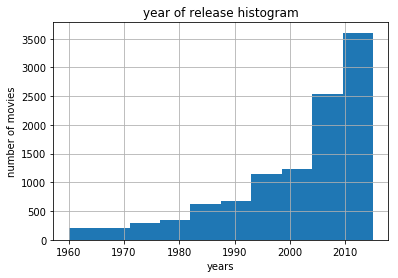

In [17]:
#The distribution of the year of release of the movie
df['release_year'].hist()
plt.title('year of release histogram')
plt.ylabel('number of movies')
plt.xlabel('years')
plt.show()

The year of release of the movie is skewed to left. these is because as the popularity of the movie of the latest years are high compared to the movie of past years.

In [18]:
#Define the function to plot the scatter plot
def cor(col1,col2,d):
  ans = sns.regplot(x = col1, y = col2, data = df, scatter_kws = {"color": "blue"}, line_kws = {"color": "black"})
  return ans


AxesSubplot(0.125,0.125;0.775x0.755)


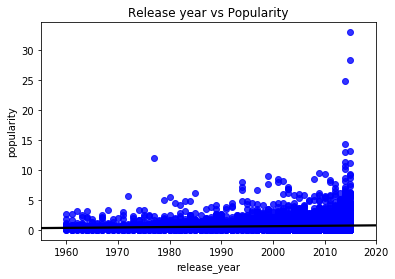

In [19]:
#Recall the function above to plot the scatter plot of the release year vs the popularity of the movies

print(cor("release_year", "popularity", df))
plt.title('Release year vs Popularity');


 The popularity of the movie and year of release of the movie are positively correlated. These implies the popularity of the movie increases as the number of years of the movie increases.

### Research question 3 (How does the runtime of the movie affect its popularity?)

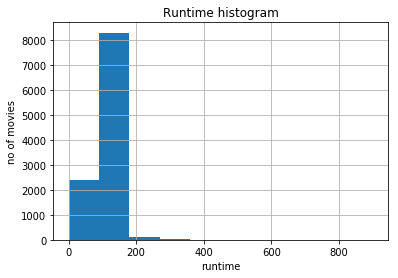

In [20]:
#The distribution of the run time of the movie
df['runtime'].hist()
plt.title('Runtime histogram')
plt.ylabel('no of movies')
plt.xlabel('runtime')
plt.show()


The distribution of the movie is slightly skewed to the right.

AxesSubplot(0.125,0.125;0.775x0.755)


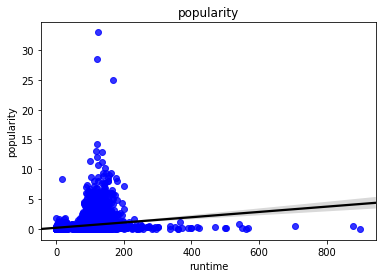

In [21]:
#The relationship between the run time of the movie and its runtime
#Recall the python function define earlier to plot the scatter plot of runtime vs popularity
print(cor("runtime", "popularity", df))
plt.title('popularity');


The popularity of the movie and run time of the movie are related positively.

<a id='conclusions'></a>
## Conclusions
>The findings and results from the above analysis is as follows:
>1. The name of the director of the movie with most popularity is Colin Trevorrow. The genre of the movies is Action|Adventure|Science Fiction|Thriller and its release year is 2015.

>2. The relationship between popularity and year of release of the movie is positve relationship. These implies that the movies released in the recent years are more popular than the movies released some years before, since the popularity of the movie increases as the number of years increases.

>3. The realationship between the run time of the movie and movie popularity is a positive realtionship, these implies that the movies with more run time are more popular compared to movies with less run time.


### Limitation
> 1. The dataset was to huge, which makes abit challenging to preview the data after loading it into pandas dataframe.
> 2. The missing values in the columns of director and genres, pose a big challenge in deciding on how to deal with them with
without changing the meaning of the data in the above two columns.




